In [22]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import random
import matplotlib.pyplot as plt
import csv

In [23]:
dfv = pd.read_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Discharge cycle\\Padded and Resampled\\NoisyInputData2.csv")
dft = pd.read_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Discharge cycle\\Padded and Resampled\\NoisyInputTempData2.csv")


In [ ]:
dfv.reset_index(inplace=True, drop=True)
dft.reset_index(inplace=True, drop=True)
#df = pd.concat([df1,df2],axis=1,join='inner')
dfv

In [32]:
scaler = MinMaxScaler()

#Extracting Voltage
trainXv = dfv.drop(columns=["y"])
trainy = dfv['y'] 
trainXv = trainXv.to_numpy()
trainy = trainy.to_numpy()
rows, columns = trainXv.shape
trainy = trainy.reshape(rows,1)
Xv_train = scaler.fit_transform(trainXv)

#Extracting Temperature
trainXt = dft.drop(columns=["y"])
trainXt = trainXt.to_numpy()
Xt_train = scaler.fit_transform(trainXt)

#trainX = np.empty((1,2), dtype=np.array)

#trainX[0,0] = trainXv
#trainX[0,1] = trainXt

Xn_train = np.array([Xv_train,Xt_train])



#Normalizing
#Xn_train = scaler.fit_transform(trainXv)
yn_train = scaler.fit_transform(trainy)


In [29]:
#Reshaping
Xn_train = Xn_train.reshape(rows, 2, columns)
X_train, X_test, y_train, y_test = train_test_split(Xn_train,yn_train , test_size=0.10)
test_rows,foo, test_columns = X_test.shape


In [31]:
f = open('Nasa Battery Data\\Battery 5\\Discharge cycle\\Padded and Resampled\\RefactoredData3.csv', 'w', newline='')

# create the csv writer
writer = csv.writer(f)
for i in Xn_train:
    writer.writerow(i)
f.close()

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(1,222), return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(LSTM(100, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(LSTM(64, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(yn_train.shape[1]))

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    name='Adam')

model.compile(optimizer='Adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 100)            129200    
                                                                 
 dropout_10 (Dropout)        (None, 1, 100)            0         
                                                                 
 dense_8 (Dense)             (None, 1, 64)             6464      
                                                                 
 lstm_11 (LSTM)              (None, 1, 100)            66000     
                                                                 
 dropout_11 (Dropout)        (None, 1, 100)            0         
                                                                 
 dense_9 (Dense)             (None, 1, 64)             6464      
                                                                 
 lstm_12 (LSTM)              (None, 64)               

In [68]:
#fitting the model to X_train and y_train dataset, and 100 epochs and saving it into history
history = model.fit(X_train,y_train, epochs=100,batch_size=5)

Epoch 1/100
56/56 [==============================] - 12s 8ms/step - loss: 0.0534
Epoch 2/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0086
Epoch 3/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0053
Epoch 4/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0068
Epoch 5/100
56/56 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 6/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0036
Epoch 7/100
56/56 [==============================] - 1s 10ms/step - loss: 0.0042
Epoch 8/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 9/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0033
Epoch 10/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 11/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 12/100
56/56 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 13/100
56/56 [===============

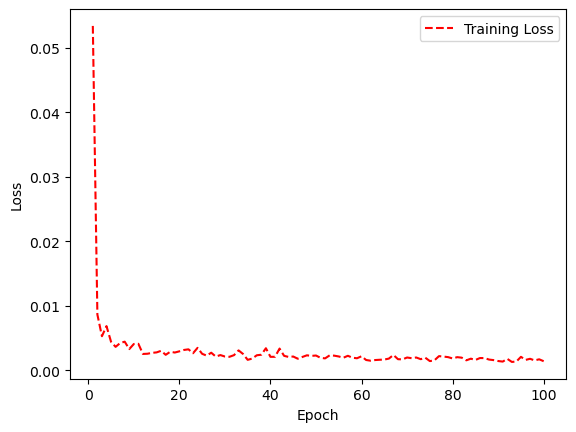

In [69]:
# Using function to get loss history
training_loss = history.history['loss']

# Code for counting the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [70]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(test_rows,1)


1/1 [==============================] - 2s 2s/step


In [71]:
yd_pred = scaler.inverse_transform(y_pred)
y_error = y_test - yd_pred
df5 = pd.DataFrame(y_test)
df6 = pd.DataFrame(yd_pred)
df7 = pd.DataFrame(y_error)
DFF = pd.concat([df5,df6,df7],axis=1,join='inner')
DFF

,0,0,0
0,0.560793,1.599848,-1.039056
1,0.366655,1.494723,-1.128068
2,0.735565,1.691937,-0.956372
3,0.118185,1.357406,-1.239221
4,0.292941,1.446597,-1.153656
5,0.504851,1.565639,-1.060788
6,0.798307,1.739347,-0.941040
7,0.154268,1.375867,-1.221599
8,0.228416,1.416733,-1.188317
9,0.478053,1.544247,-1.066193


In [72]:
from sklearn.metrics import mean_absolute_error
print('MAE for y: %.3f' % mean_absolute_error(y_test, yd_pred))

MAE for y: 1.105


Data plotting
pd.read_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Discharge cycle\\Padded and Resampled\\NoisyInputData2.csv")

In [ ]:
DFF.plot()
plt.show()

In [ ]:
x_axis 
plt.scatter(y_test)
plt.xlabel('Time step')
plt.ylabel('Capacity')